# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout #Different components/layers of a neural network.
from keras.models import Sequential # neural network model

# Loading the data

The provided data is encoded into CSV files, with X_test_sat4.csv containing flattened images extracted from space, measuring 28 x 28 x 4 in dimensions. 

These images consist of the conventional red, green, and blue channels seen in typical images, while the fourth channel represents near-infrared data. 

Due to the extensive size of the training set, I opted to utilize a smaller test set. 

Simultaneously, I am loading the second file which contains labels corresponding to each image. These labels fall into one of four categories: barren land, trees, grassland, and other. 

Each row within this file is structured as [1, 0, 0, 0], wherein only one of the four values is set to 1, indicating the respective class in the order presented earlier. For instance, if the label is [1, 0, 0, 0], the image depicts barren land. Similarly, [0, 1, 0, 0] signifies trees, [0, 0, 1, 0] denotes grassland, and so forth.

In [15]:
x_train_path = 'X_test_sat4.csv' # Contains training images (28x28x4)
y_train_path = 'y_test_sat4.csv' # Contains labels for training images (one-hot encoded)
print ('Loading Training Data')
X_train = pd.read_csv(x_train_path)
print ('Loaded 28 x 28 x 4 images')

Y_train = pd.read_csv(y_train_path)
print ('Loaded labels')

Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels


## Data Preprocessing

In [16]:
# The loaded data is converted from pandas DataFrames to numpy arrays
X_train = X_train.values
Y_train = Y_train.values
print ('We have',X_train.shape[0],'examples and each example is a list of',
       X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')

We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


## Reshaping Images

Upon extracting information from the CSV files, I can reshape the data to reconstruct the original images, enabling us to preview the images before commencing the training process. 

In [17]:
'''The training images are reshaped from a list of numbers to a 4D tensor of shape (samples, width, height, channels):
X_train is reshaped to X_train_img using .reshape() and cast to float.'''

X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img.shape)

(99999, 28, 28, 4)


# Visualising an image

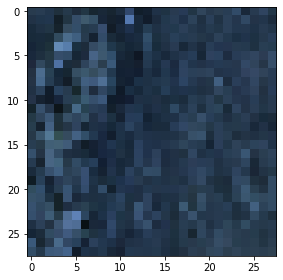

Barren Land


In [18]:
#Let's take a look at one image. Keep in mind the channels are R,G,B, and I(Infrared)

'''An example image is visualized using skimage.io.imshow and matplotlib.pyplot.show():
X_train_img[ix, :, :, 0:3] selects the RGB channels of the image.
The corresponding label is displayed based on the one-hot encoded representation.'''

ix = 5 #Type a number between 0 and 99,999 inclusive

imshow(np.squeeze(X_train_img[ix,:,:,0:3] * 255).astype(np.uint8)) #Only seeing the RGB channels
plt.show()

#Tells what the image is

if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

# Defining the model

We have the option to select between two distinct model types: a basic artificial neural network or a convolutional neural network. To begin with, I will opt for the simpler artificial neural network. This network will consist of only a single layer, which is the output layer. It's important to note that this particular network is not anticipated to possess significant computational power and is likely to exhibit relatively sluggish performance.

In [19]:
'''A simple neural network model is defined using the Sequential API:
The model consists of a single dense layer with 4 output units (one for each class) and a softmax activation function.'''

model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

## Data Normalisation


In [7]:
# The training data (X_train_img) is normalized by dividing all values by 255.
X_train = X_train/255

## Training the model

In [11]:
'''
Optimizer: Adam optimizer.
Loss function: Categorical cross-entropy (suitable for multiclass classification).
Metrics: Accuracy'''

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12548     
                                                                 
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
2813/2813 [==============================] - 4s 2ms/step - loss: 0.6474 - accuracy: 0.7283 - val_loss: 0.6326 - val_accuracy: 0.7243
Epoch 2/5
2813/2813 [==============================] - 4s 1ms/step - loss: 0.6382 - accuracy: 0.7301 - val_loss: 0.5957 - val_accuracy: 0.7457
Epoch 3/5
2813/2813 [==============================] - 4s 1ms/step - loss: 0.6358 - accuracy: 0.7333 - val_loss: 0.5748 - val_accuracy: 0.7571
Epoch 4/5
2813/2813 [==============================] - 4s 1ms/step - loss: 0.6306 - accuracy: 0.7340 - val_loss: 0.5735 - val_accuracy: 0.7593
Epoch 5/

## Evaluating the model on images

In [12]:
# Selects the last 1000 images

preds = model.predict(X_train[1000:], verbose=1)

3094/3094 [==============================] - 3s 1ms/step


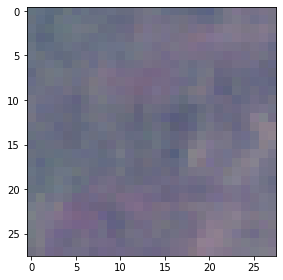

Prediction:
100.0% probability barren land,
0.0% probability trees,
0.0% probability grassland,
0.0% probability other

Ground Truth: Barren Land


In [14]:
ix = 90 # Type a number between 0 and 999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3] * 255).astype(np.uint8)) #Only seeing the RGB channels
plt.show()
# Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')

# Using CNN

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imshow
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [28]:
# Loading the data
x_train_path = 'X_test_sat4.csv'
y_train_path = 'y_test_sat4.csv'
print('Loading Training Data')
X_train = pd.read_csv(x_train_path)
print('Loaded 28 x 28 x 4 images')

Y_train = pd.read_csv(y_train_path)
print('Loaded labels')

# Data Preprocessing
X_train = X_train.values
Y_train = Y_train.values
print('We have', X_train.shape[0], 'examples and each example is a list of',
      X_train.shape[1], 'numbers with', Y_train.shape[1], 'possible classifications.')

Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels
We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


In [29]:

X_train_img = X_train.reshape(-1, 28, 28, 4)
Y_train = Y_train.argmax(axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_img, Y_train, test_size=0.1, random_state=42)


# Defining the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 4)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, Y_val))


# Evaluating the model on images
ix = 90
imshow(np.squeeze(X_val[ix, :, :, 0:3]).astype(np.uint8))
plt.show()

preds = model.predict(X_val[ix:ix + 1], verbose=1)

print('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[0, 0] * 100, preds[0, 1] * 100, preds[0, 2] * 100, preds[0, 3] * 100))

ground_truth = np.argmax(Y_val[ix], axis=0)
if ground_truth == 0:
    print('Barren Land')
elif ground_truth == 1:
    print('Trees')
elif ground_truth == 2:
    print('Grassland')
else:
    print('Other')


Epoch 1/10


ValueError: in user code:

    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/palukgupta/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible
